In [1]:
!unzip data.zip

Archive:  data.zip
  inflating: players_metadata.csv    
  inflating: players.json            


In [1]:
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import string
import numpy as np


In [2]:
json_file = open('players.json')
data = json.load(json_file)


In [3]:
json_df = pd.read_json(r'players.json')

In [4]:
json_df['Player_Name'] = json_df.last_name.str.upper() + ', '+ json_df.first_name.str.upper()
json_df = json_df.drop(columns=['first_name', 'last_name'])
json_df.head(3)

,id,squad_id,cost,status,stats,positions,is_bye,locked,notes,Player_Name
0,1,12,350000,playing,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",[2],0,0,{},"STRELNIEKS, JANIS"
1,2,16,680000,playing,"{'scores': {'33': 4.4, '32': 13, '31': 2.2, '3...",[1],0,0,{},"KAVALIAUSKAS, ANTANAS"
2,3,7,460000,not-playing,"{'scores': {'30': 1, '29': 5.5, '28': 0, '27':...",[3],1,0,{},"BERTANS, DAIRIS"


In [5]:
json_df =json_df.reindex(columns=['Player_Name', 'cost', 'status', 'stats', 'positions', 'is_bye', 'locked', 'notes'])
json_df.head()


,Player_Name,cost,status,stats,positions,is_bye,locked,notes
0,"STRELNIEKS, JANIS",350000,playing,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",[2],0,0,{}
1,"KAVALIAUSKAS, ANTANAS",680000,playing,"{'scores': {'33': 4.4, '32': 13, '31': 2.2, '3...",[1],0,0,{}
2,"BERTANS, DAIRIS",460000,not-playing,"{'scores': {'30': 1, '29': 5.5, '28': 0, '27':...",[3],1,0,{}
3,"PAPPAS, NIKOS",280000,playing,"{'scores': {'33': -1, '32': -2, '31': -1.8, '3...",[3],0,0,{}
4,"GULER, SINAN",180000,playing,"{'scores': {'23': 2.2, '22': 0, '21': 2, '19':...","[2, 3]",0,0,{}


In [6]:
stats_df = pd.DataFrame(json_df.stats)

In [7]:
stat_columns = []
stat_columns = list(stats_df.stats.loc[0].keys())
stats_dic = {}

processed_stats_df = pd.DataFrame()

for ind in range(len(stats_df)):
    processed_stats_df = processed_stats_df.append(stats_df.stats.loc[ind], ignore_index=True)
    

In [8]:
processed_json_df = pd.merge(json_df, processed_stats_df, on=json_df.index).drop(columns='key_0')
processed_json_df.head(1)

,Player_Name,cost,status,stats,positions,is_bye,locked,notes,avg_points,games_played,...,last_5_avg,low_score,match_scores,owned_by,prices,round_rank,scores,season_rank,selections,total_points
0,"STRELNIEKS, JANIS",350000,playing,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",[2],0,0,{},7.15,33.0,...,3.36,-3.0,"{'2017330251': 3, '2017320247': 8.8, '20173102...",5.0,"{'1': 1000000, '2': 970000, '3': 890000, '4': ...",59.0,"{'33': 3, '32': 8.8, '31': -2, '30': 6, '29': ...",116.0,4966.0,235.9


In [9]:
selected_json_df = processed_json_df[['Player_Name', 'cost', 'avg_points', 'selections']]

In [10]:
selected_json_df = selected_json_df.set_index(selected_json_df.Player_Name).drop(columns = 'Player_Name').sort_index()

In [11]:
selected_json_df.head()

,cost,avg_points,selections
Player_Name,,,
"ABALDE, ALBERTO",860000,7.39,1522.0
"ABASS, AWUDU",150000,0.74,595.0
"ADAMS, JOSH",630000,6.66,566.0
"AGRAVANIS, DIMITRIOS",350000,2.74,4537.0
"ANDERSON, JAMES",660000,8.49,3854.0


In [12]:
selected_json_df.describe().round()

,cost,avg_points,selections
count,274.0,274.0,274.0
mean,728285.0,6.0,4310.0
std,513852.0,5.0,5685.0
min,120000.0,-4.0,2.0
25%,272500.0,2.0,1034.0
50%,630000.0,6.0,2271.0
75%,1060000.0,10.0,4945.0
max,2220000.0,23.0,39332.0


In [13]:
ind_startswith = selected_json_df.index.str.startswith('A')

selected_json_df.loc[ind_startswith]

,cost,avg_points,selections
Player_Name,,,
"ABALDE, ALBERTO",860000,7.39,1522.0
"ABASS, AWUDU",150000,0.74,595.0
"ADAMS, JOSH",630000,6.66,566.0
"AGRAVANIS, DIMITRIOS",350000,2.74,4537.0
"ANDERSON, JAMES",660000,8.49,3854.0
"ANTETOKOUNMPO, THANASIS",560000,4.17,14152.0
"ANTIC, PERO",350000,6.60,4610.0
"ANTONOV, SEMEN",440000,4.40,2419.0
"APIC, DRAGAN",120000,-0.67,3590.0


Text(0.5, 0, 'Selections')

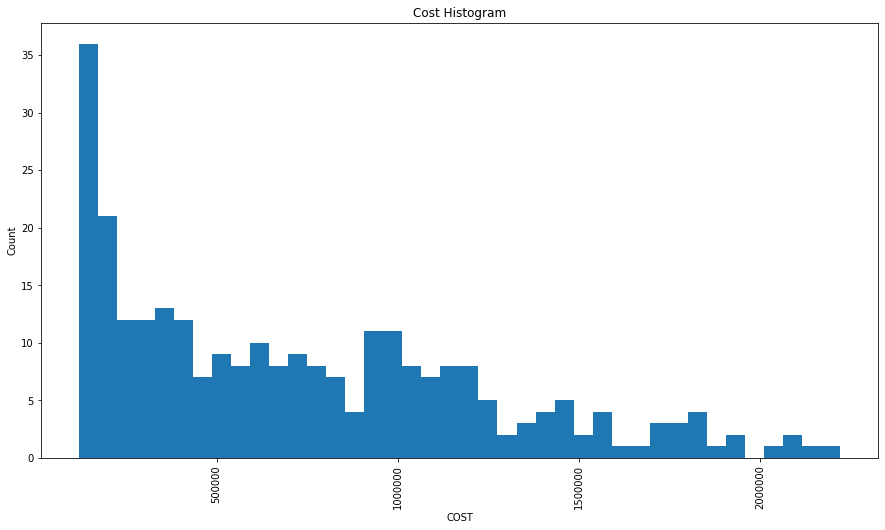

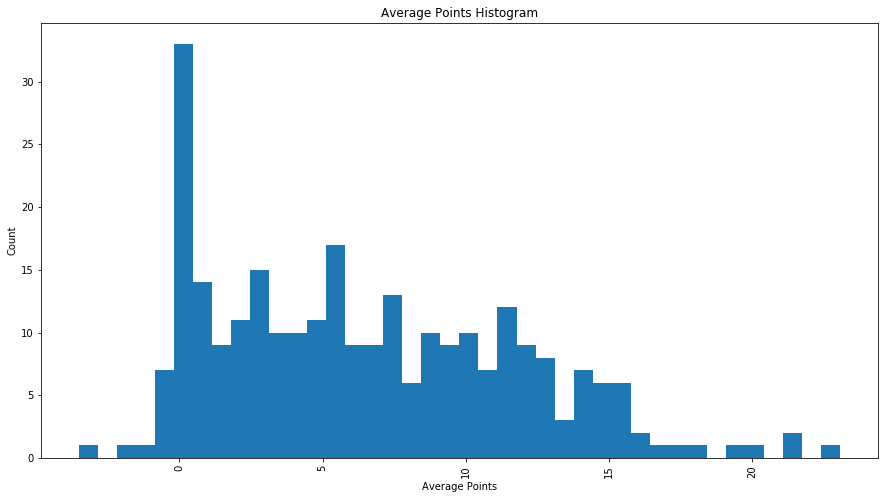

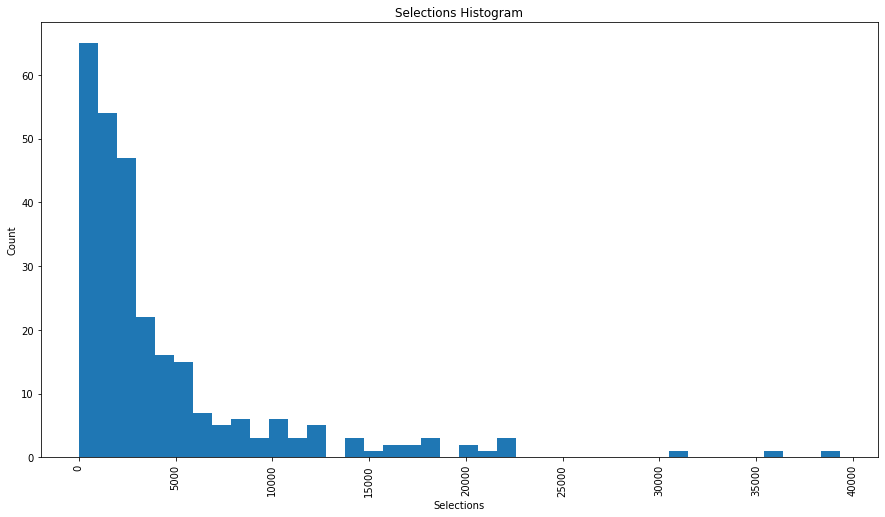

In [33]:
# alphabet = list(string.ascii_uppercase)
# for letter in alphabet: 
    # ind_startswith = selected_json_df.index.str.startswith(letter)

plt.figure()
selected_json_df.cost.plot.hist(figsize=(15,8),rot=90, title='Cost Histogram', bins=40)
plt.ylabel('Count')
plt.xlabel('COST')

plt.figure()
selected_json_df.avg_points.plot.hist(figsize=(15,8),rot=90, title='Average Points Histogram', bins=40)
plt.ylabel('Count')
plt.xlabel('Average Points')

plt.figure()
selected_json_df.selections.plot.hist(figsize=(15,8),rot=90, title='Selections Histogram', bins=40)
plt.ylabel('Count')
plt.xlabel('Selections')


In [35]:
csv_df = pd.read_csv('players_metadata.csv', delimiter='|')

In [36]:
csv_df.head()

,Player_Name,position,nationality
0,"ABALDE, ALBERTO",Forward,Spain
1,"ABASS, AWUDU",Guard,Italy
2,"ADAMS, JOSH",Guard,United States of America
3,"AGRAVANIS, DIMITRIS",Forward,Greece
4,"ANDERSON, JAMES",Guard,United States of America


In [157]:
merged_df = pd.merge(selected_json_df, csv_df, on='Player_Name')
merged_df.head(1)

,Player_Name,cost,avg_points,selections,position,nationality
0,"ABALDE, ALBERTO",860000,7.39,1522.0,Forward,Spain


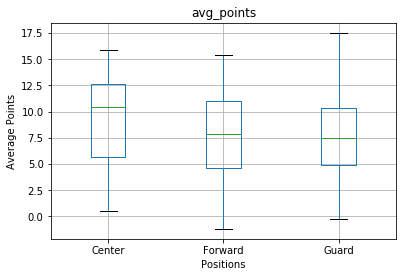

In [158]:
top3_nats = list(merged_df.nationality.value_counts()[:3].index)
top3_inds = [False]*len(merged_df)

for nat in top3_nats:
    temp_inds = merged_df.nationality == nat
    top3_inds = np.logical_or(top3_inds,  temp_inds)

top3_df = merged_df[top3_inds]
top3_df.boxplot(column='avg_points', by='position');
plt.suptitle("");
plt.ylabel('Average Points');
plt.xlabel('Positions');

In [159]:
merged_df.position.value_counts()

Guard      97
Forward    90
Center     55
Name: position, dtype: int64

In [162]:
ext_merged_df = pd.merge(processed_json_df, csv_df, on='Player_Name')
ext_merged_df.head(1)

,Player_Name,cost,status,stats,positions,is_bye,locked,notes,avg_points,games_played,...,match_scores,owned_by,prices,round_rank,scores,season_rank,selections,total_points,position,nationality
0,"STRELNIEKS, JANIS",350000,playing,"{'scores': {'33': 3, '32': 8.8, '31': -2, '30'...",[2],0,0,{},7.15,33.0,...,"{'2017330251': 3, '2017320247': 8.8, '20173102...",5.0,"{'1': 1000000, '2': 970000, '3': 890000, '4': ...",59.0,"{'33': 3, '32': 8.8, '31': -2, '30': 6, '29': ...",116.0,4966.0,235.9,Guard,Latvia


In [203]:
pd.DataFrame(processed_json_df['scores'])

,scores
0,"{'33': 3, '32': 8.8, '31': -2, '30': 6, '29': ..."
1,"{'33': 4.4, '32': 13, '31': 2.2, '30': 5.5, '2..."
2,"{'30': 1, '29': 5.5, '28': 0, '27': 10, '26': ..."
3,"{'33': -1, '32': -2, '31': -1.8, '30': 8.8, '2..."
4,"{'23': 2.2, '22': 0, '21': 2, '19': 3.3, '17':..."
...,...
269,"{'33': 3, '32': 5, '31': 9.9, '30': 19.8, '29'..."
270,"{'16': 0, '14': -2, '13': -2, '12': 11, '11': ..."
271,"{'30': -1, '29': 11, '28': 22, '27': 11, '26':..."
272,"{'4': 6, '3': 0}"


In [247]:
change_df = ext_merged_df[['Player_Name', 'scores', 'prices']]
corr_df = pd.DataFrame(columns=['Player_Name', 'current-score', 'last5-scores', 'price_change', 'per_price_change'])
price_dic = {}
per_price_dic = {}
score_dic = {}
for ind in range(1, len(change_df)):
    keys = list(change_df.loc[ind]['scores'].keys())
    keys.reverse()
    temp_dic = {}
    temp_per_dic = {}
    temp_score_dic = {}
    for round_ in range(1, len(keys)):
        curr_score = change_df.loc[ind]['scores'][keys[round_]]
        
        prev_price = change_df.loc[ind]['prices'][keys[round_-1]]
        curr_price = change_df.loc[ind]['prices'][keys[round_]
                                                 ]
        price_change = curr_price - prev_price
        percentage_price_change = round(100 * price_change / prev_price,3)
        temp_dic[round_] = price_change 
        temp_per_dic[round_] = percentage_price_change 
        temp_score_dic[round_] = curr_score
        
    price_dic[change_df.loc[ind]['Player_Name']] = temp_dic
    per_price_dic[change_df.loc[ind]['Player_Name']] = temp_per_dic
    score_dic[change_df.loc[ind]['Player_Name']] = temp_score_dic

In [248]:
price_df = pd.DataFrame(price_dic)
per_price_df = pd.DataFrame(per_price_dic)
score_df = pd.DataFrame(score_dic)


In [277]:
current_round = 10

if current_round > 5:
    notna_ind = price_df.iloc[current_round].notna()
    per_price_change_array = per_price_df.iloc[current_round][notna_ind]
    curr_score = score_df.iloc[current_round][notna_ind]
    prev_score = score_df.iloc[current_round-1][notna_ind]
    pprev_score = score_df.iloc[current_round-2][notna_ind]   
    ppprev_score = score_df.iloc[current_round-3][notna_ind]       
    pppprev_score = score_df.iloc[current_round-4][notna_ind]
    x = pd.DataFrame(np.array([per_price_change_array, curr_score, prev_score, pprev_score, ppprev_score, pppprev_score]))

In [278]:
y = x.corr()

<Figure size 1080x1080 with 0 Axes>

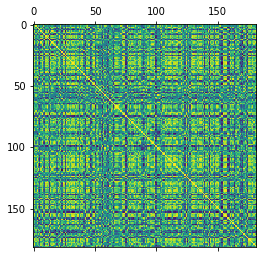

In [281]:
plt.figure(figsize=(15,15))
plt.matshow(y)
plt.show()